In [2]:
#####SDG Classification#######

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE

from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
#data cleaning
data = pd.read_csv('responses.csv')
data['Smoking'] = data['Smoking'].map(dict(zip(data['Smoking'].unique(), np.arange(1,5))))
data['Alcohol']= data['Alcohol'].map(dict(zip(data['Alcohol'].unique(), np.array([3,2,1]))))
data['Punctuality']= data['Punctuality'].map(dict(zip(data['Punctuality'].unique(), np.array([3,2,1]))))
data['Lying']= data['Lying'].map(dict(zip(data['Lying'].unique(), np.array([1,3,2,4]))))
data['Internet usage']= data['Internet usage'].map(dict(zip(data['Internet usage'].unique(), np.array([3,4,2,1]))))
data['Gender']= data['Gender'].map(dict(zip(data['Gender'].unique(), np.array([0,1]))))
data['Only child']= data['Only child'].map(dict(zip(data['Only child'].unique(), np.array([0,1]))))
cat_columns = [145,146,148,149]
dummy_columns = pd.get_dummies(data.iloc[:,cat_columns])
data.drop(data.columns[cat_columns], axis =1, inplace= True)
data = pd.concat([data,dummy_columns], axis = 1)

In [226]:
data.shape


(977, 158)

In [4]:
def optimal_feature_number(X, Y, model):
    sizes = [1, 4/5, 3/4, 2/3, 3/5, 1/2,  2/5, 1/3, 1/4, 1/5]
    scores = []
    sizes = [round(x*X.shape[1]) for x in sizes]
    for val in sizes: 
        rfe_selector = RFE(estimator=model, n_features_to_select=val , step=5, verbose=5)
        rfe_selector.fit(X_train, list(y_train))
        rfe_support = rfe_selector.get_support()
        rfe_feature = pd.DataFrame(X_train).loc[:,rfe_support].columns.tolist()

        X_train_fs = X_train[:,rfe_feature]
        X_test_fs = X_test[:,rfe_feature]
        model.fit(X_train_fs, list(y_train))
        y_pred = model.predict(X_test_fs)
        scores.append(metrics.accuracy_score(list(y_test), y_pred))
    
    n_features = sizes[scores.index(max(scores))]
    return n_features



base linear SVC with no feature selection
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.

C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'



Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.

C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'



Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.

C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'



Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 52 features.
Fitting estimator with 47 features.
Fitting estimator with 42 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estim

C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'



Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 52 features.
Fitting estimator with 47 features.
Fitting estimator with 42 features.
Fitting estimator with 37 features.
Fitting estimator with 32 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
78 selected features
polynomial SVC


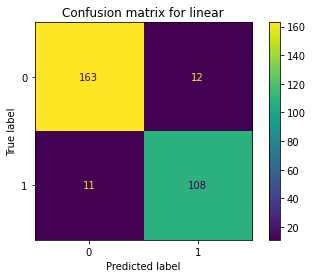

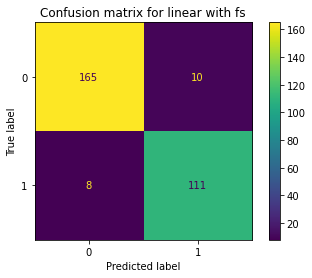

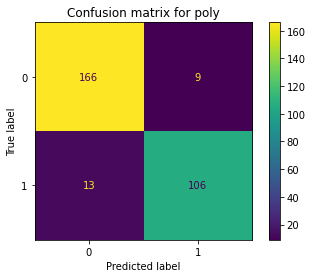

In [6]:
#trying svm with cross validiation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

data_array = data.values
data_array
Y = data_array[:,144]
X = np.delete(data_array, [144], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data


SVC = svm.SVC( kernel = 'linear', max_iter = 25000, random_state = 52)

SVC.fit(X_train, list(y_train))
y_pred = SVC.predict(X_test)
print('base linear SVC with no feature selection')
base = ('base', round(metrics.accuracy_score(list(y_test), y_pred),4))
metrics.plot_confusion_matrix(SVC, X_test, list(y_test))
plt.title('Confusion matrix for linear')
######################################
from sklearn.feature_selection import RFE
optimal_number = optimal_feature_number(X,Y,SVC)

rfe_selector = RFE(estimator=SVC, n_features_to_select=optimal_number, step=5, verbose=5)
rfe_selector.fit(X_train, list(y_train))
rfe_support = rfe_selector.get_support()
rfe_feature = pd.DataFrame(X_train).loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

X_train_fs = X_train[:,rfe_feature]
# transform test input data
X_test_fs = X_test[:,rfe_feature]
SVC = svm.SVC( kernel = 'linear', max_iter = 25000, random_state = 52)

SVC.fit(X_train_fs, list(y_train))
y_pred = SVC.predict(X_test_fs)
fs = ('fs', round(metrics.accuracy_score(list(y_test), y_pred),4))

metrics.plot_confusion_matrix(SVC, X_test_fs, list(y_test))
plt.title('Confusion matrix for linear with fs')

SVC = svm.SVC( kernel = 'poly', max_iter = 25000, random_state = 52)
SVC.fit(X_train, list(y_train))
y_pred = SVC.predict(X_test)
print('polynomial SVC')
poly = ('poly', round(metrics.accuracy_score(list(y_test), y_pred),4))
metrics.plot_confusion_matrix(SVC, X_test, list(y_test))
plt.title('Confusion matrix for poly')
scores_list = [base, fs, poly]



Text(0.5, 1.0, 'Aggregate accuracy for gender')

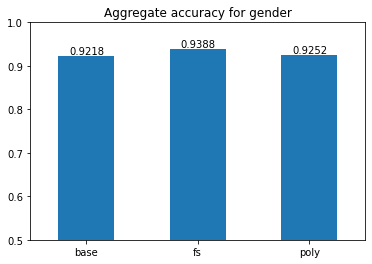

In [7]:
import numpy as np                                                               
import matplotlib.pyplot as plt


labels, ys = zip(*scores_list)
xs = np.arange(len(labels)) 
width = 0.5

fig = plt.figure()                                                               
ax = fig.gca()  #get current axes
ax.bar(xs, ys, width, align='center')

#Remove the default x-axis tick numbers and  
#use tick numbers of your own choosing:
#Replace the tick numbers with strings:
#Remove the default y-axis tick numbers and  
#use tick numbers of your own choosing:
plt.axis([-0.5, 2.5, 0.5, 1])
for i, v in enumerate(ys):
    plt.text(xs[i] - 0.15, v + 0.005, str(v))
ax.set_xticks(xs)
ax.set_xticklabels(labels)
plt.title('Aggregate accuracy for gender')

base linear SVC with no feature selection
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 featur

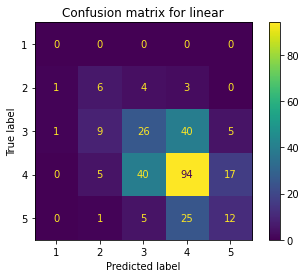

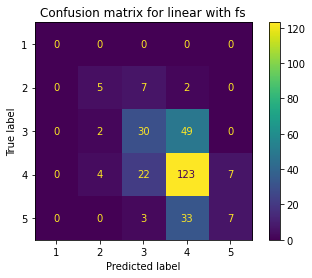

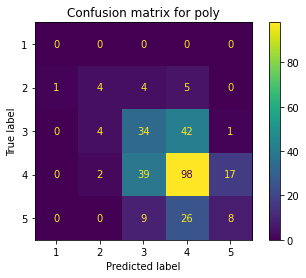

In [219]:
#trying svm with cross validiation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

data_array = data.values
data_array
Y = data_array[:,123]
X = np.delete(data_array, 123, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data


SVC = svm.SVC( kernel = 'linear', max_iter = 25000, random_state = 52)

SVC.fit(X_train, list(y_train))
y_pred = SVC.predict(X_test)
print('base linear SVC with no feature selection')
base = ('base', round(metrics.accuracy_score(list(y_test), y_pred),4))
metrics.plot_confusion_matrix(SVC, X_test, list(y_test))
plt.title('Confusion matrix for linear')
######################################
from sklearn.feature_selection import RFE
optimal_number = optimal_feature_number(X,Y,SVC)

rfe_selector = RFE(estimator=SVC, n_features_to_select=optimal_number, step=5, verbose=5)
rfe_selector.fit(X_train, list(y_train))
rfe_support = rfe_selector.get_support()
rfe_feature = pd.DataFrame(X_train).loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

X_train_fs = X_train[:,rfe_feature]
# transform test input data
X_test_fs = X_test[:,rfe_feature]
SVC = svm.SVC( kernel = 'linear', max_iter = 25000, random_state = 52)

SVC.fit(X_train_fs, list(y_train))
y_pred = SVC.predict(X_test_fs)
print('base linear SVC with feature selection--top 30 features--')
fs = ('fs', round(metrics.accuracy_score(list(y_test), y_pred),4))

metrics.plot_confusion_matrix(SVC, X_test_fs, list(y_test), labels = np.arange(1,6))
plt.title('Confusion matrix for linear with fs')

SVC = svm.SVC( kernel = 'poly', max_iter = 25000, random_state = 52)
SVC.fit(X_train, list(y_train))
y_pred = SVC.predict(X_test)
print('polynomial SVC')
poly = ('poly', round(metrics.accuracy_score(list(y_test), y_pred),4))
metrics.plot_confusion_matrix(SVC, X_test, list(y_test), labels = np.arange(1,6))
plt.title('Confusion matrix for poly')
scores_list = [base, fs, poly]


Text(0.5, 1.0, 'Aggregate accuracy for happiness')

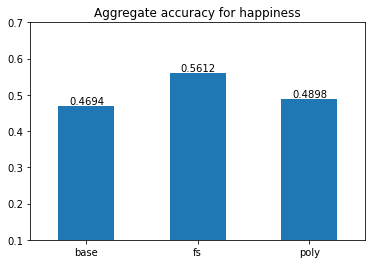

In [221]:
import numpy as np                                                               
import matplotlib.pyplot as plt


labels, ys = zip(*scores_list)
xs = np.arange(len(labels)) 
width = 0.5

fig = plt.figure()                                                               
ax = fig.gca()  #get current axes
ax.bar(xs, ys, width, align='center')

#Remove the default x-axis tick numbers and  
#use tick numbers of your own choosing:
#Replace the tick numbers with strings:
#Remove the default y-axis tick numbers and  
#use tick numbers of your own choosing:
plt.axis([-0.5, 2.5, 0.10, 0.70])
for i, v in enumerate(ys):
    plt.text(xs[i] - 0.15, v + 0.005, str(v))
ax.set_xticks(xs)
ax.set_xticklabels(labels)
plt.title('Aggregate accuracy for happiness')


In [8]:
Y = data_array[:,123]
import random
binary_giving = []
for val in Y:
    if val < 2:
        binary_giving.append(0)
    elif val>3:
        binary_giving.append(1)
    else:
        temp = random.uniform(0,1)
        if temp < 0.5:
            binary_giving.append(0)
        else:
            binary_giving.append(1)
Y_binary = np.array(binary_giving)
X.shape

(977, 157)

base linear SVC with no feature selection
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Fitting estimator with 127 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Fitting estimator with 122 features.
Fitting estimator with 157 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 102 features.

C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'



Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.
Fitting estimator with 122 features.

C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv


Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 102 features.

C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'



Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 52 features.
Fitting estimator with 47 features.
Fitting estimator with 42 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.
Fitting estimator with 142 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 137 features.
Fitting estimator with 132 features.
Fitting estimator with 127 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.
Fitting estimator with 107 features.
Fitting estimator with 102 features.

C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'



Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 52 features.
Fitting estimator with 47 features.
Fitting estimator with 42 features.
Fitting estimator with 37 features.
Fitting estimator with 32 features.
Fitting estimator with 157 features.
Fitting estimator with 152 features.
Fitting estimator with 147 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 142 features.
Fitting estimator with 137 features.
Fitting estimator with 132 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solv

Fitting estimator with 127 features.
Fitting estimator with 122 features.
Fitting estimator with 117 features.
Fitting estimator with 112 features.


C:\Users\JayZ\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Fitting estimator with 107 features.
Fitting estimator with 102 features.
Fitting estimator with 97 features.
Fitting estimator with 92 features.
Fitting estimator with 87 features.
Fitting estimator with 82 features.
Fitting estimator with 77 features.
Fitting estimator with 72 features.
Fitting estimator with 67 features.
Fitting estimator with 62 features.
Fitting estimator with 57 features.
Fitting estimator with 52 features.
Fitting estimator with 47 features.
Fitting estimator with 42 features.
Fitting estimator with 37 features.
Fitting estimator with 32 features.
31 selected features
base linear SVC with feature selection--top 30 features--
polynomial SVC


Text(0.5, 1.0, 'Aggregate accuracy for happiness')

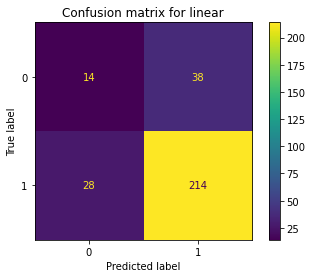

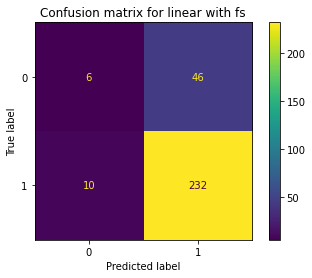

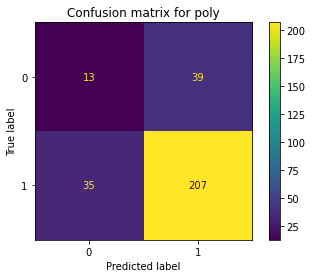

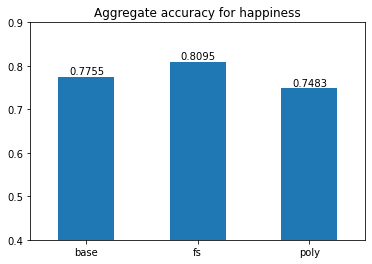

In [11]:
####feature engineering happiness into binary variable#####
Y = Y_binary
X = np.delete(data_array, 123, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data


SVC = svm.SVC( kernel = 'linear', max_iter = 25000, random_state = 52)

SVC.fit(X_train, list(y_train))
y_pred = SVC.predict(X_test)
print('base linear SVC with no feature selection')
base = ('base', round(metrics.accuracy_score(list(y_test), y_pred),4))
metrics.plot_confusion_matrix(SVC, X_test, list(y_test))
plt.title('Confusion matrix for linear')
######################################
from sklearn.feature_selection import RFE
optimal_number = optimal_feature_number(X,Y,SVC)

rfe_selector = RFE(estimator=SVC, n_features_to_select=optimal_number, step=5, verbose=5)
rfe_selector.fit(X_train, list(y_train))
rfe_support = rfe_selector.get_support()
rfe_feature = pd.DataFrame(X_train).loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

X_train_fs = X_train[:,rfe_feature]
# transform test input data
X_test_fs = X_test[:,rfe_feature]
SVC = svm.SVC( kernel = 'linear', max_iter = 25000, random_state = 52)

SVC.fit(X_train_fs, list(y_train))
y_pred = SVC.predict(X_test_fs)
print('base linear SVC with feature selection--top 30 features--')
fs = ('fs', round(metrics.accuracy_score(list(y_test), y_pred),4))

metrics.plot_confusion_matrix(SVC, X_test_fs, list(y_test))
plt.title('Confusion matrix for linear with fs')

SVC = svm.SVC( kernel = 'poly', max_iter = 25000, random_state = 52)
SVC.fit(X_train, list(y_train))
y_pred = SVC.predict(X_test)
print('polynomial SVC')
poly = ('poly', round(metrics.accuracy_score(list(y_test), y_pred),4))
metrics.plot_confusion_matrix(SVC, X_test, list(y_test))
plt.title('Confusion matrix for poly')
scores_list = [base, fs, poly]

import numpy as np                                                               
import matplotlib.pyplot as plt


labels, ys = zip(*scores_list)
xs = np.arange(len(labels)) 
width = 0.5

fig = plt.figure()                                                               
ax = fig.gca()  #get current axes
ax.bar(xs, ys, width, align='center')

#Remove the default x-axis tick numbers and  
#use tick numbers of your own choosing:
#Replace the tick numbers with strings:
#Remove the default y-axis tick numbers and  
#use tick numbers of your own choosing:
plt.axis([-0.5, 2.5, 0.40, 0.9])
for i, v in enumerate(ys):
    plt.text(xs[i] - 0.15, v + 0.005, str(v))
ax.set_xticks(xs)
ax.set_xticklabels(labels)
plt.title('Aggregate accuracy for happiness')
